In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [6]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [7]:
data['pm2.5'].isna().sum()               #前25个NAN切片剔除，其余的做填充

2067

In [8]:
data = data.iloc[24:].fillna(method = 'ffill')                #前项填充

In [9]:
data['pm2.5'].isna().sum()  

0

In [10]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [11]:
import datetime

In [12]:
datetime.datetime(year=2010, month=1, day=2, hour=1)

datetime.datetime(2010, 1, 2, 1, 0)

In [13]:
data['time'] = data.apply(lambda x: datetime.datetime(year=x['year'],
                                       month=x['month'],
                                       day=x['day'],
                                       hour=x['hour']),
    axis=1
)

In [14]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,time
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [15]:
data.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True) #inplac立即生效

In [16]:
data.set_index('time', inplace=True)

In [17]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [18]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [19]:
data = data.join(pd.get_dummies(data.cbwd))
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0


In [20]:
del data['cbwd']

In [21]:
data.tail()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0
2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,249.85,0,0,0,1,0,0


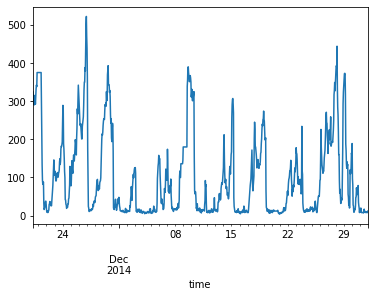

In [22]:
data['pm2.5'][-1000:].plot()

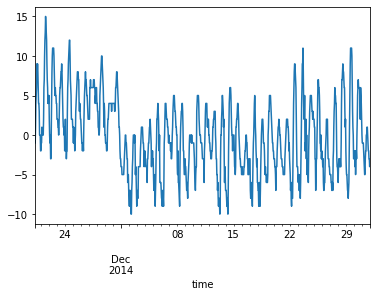

In [23]:
data['TEMP'][-1000:].plot()

In [24]:
seq_length = 5*24                   #观测时间与预测时间
delay = 24

In [25]:
data

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


In [26]:
data_ = []

In [27]:
for i in range(len(data) - seq_length-delay):
    data_.append(data.iloc[i:i + seq_length + delay])  

In [28]:
data_[0].shape

(144, 11)

In [29]:
data_ = np.array([df.values for df in data_])

In [30]:
data_.shape

(43656, 144, 11)

In [31]:
np.random.shuffle(data_)

In [32]:
x = data_[:, :5*24, :]

In [33]:
y = data_[:, -1, 0]

In [34]:
x.shape

(43656, 120, 11)

In [35]:
y.shape

(43656,)

In [36]:
split_b = int(data_.shape[0]*0.8)      #切片数量

In [37]:
train_x = x[ :split_b]
train_y = y[ :split_b]

test_x = x[split_b: ]
test_y = y[split_b: ]

In [38]:
mean = train_x.mean(axis=0)      #计算每一列的均值
std = train_x.std(axis=0)        #方差

In [39]:
train_x = (train_x - mean) / std

test_x = (test_x - mean )/ std

In [40]:
batch_size = 128

In [41]:
train_x.shape

(34924, 120, 11)

In [42]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape = (train_x.shape[1:])))     #扁平化为二维数据
model.add(layers.Dense(32, activation= 'relu'))
model.add(layers.Dense(1))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1320)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                42272     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 42,305
Trainable params: 42,305
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

In [45]:
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=50, validation_data=(test_x, test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/50
34924/34924 [==============================] - 4s 103us/sample - loss: 10807.8772 - mae: 73.5019 - val_loss: 8653.7819 - val_mae: 68.2669
Epoch 2/50
34924/34924 [==============================] - 2s 62us/sample - loss: 7876.9531 - mae: 65.5153 - val_loss: 7537.3504 - val_mae: 63.4720
Epoch 3/50
34924/34924 [==============================] - 2s 61us/sample - loss: 7076.5184 - mae: 61.8252 - val_loss: 7152.9176 - val_mae: 61.9860
Epoch 4/50
34924/34924 [==============================] - 2s 62us/sample - loss: 6716.0972 - mae: 60.0886 - val_loss: 6968.6544 - val_mae: 61.5077
Epoch 5/50
34924/34924 [==============================] - 2s 61us/sample - loss: 6467.7498 - mae: 58.9531 - val_loss: 6903.8440 - val_mae: 61.3279
Epoch 6/50
34924/34924 [==============================] - 2s 63us/sample - loss: 6293.7955 - mae: 58.1672 - val_loss: 6666.4781 - val_mae: 59.4751
Epoch 7/50
34924/34924 [==============================] - 2s 61us/s

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

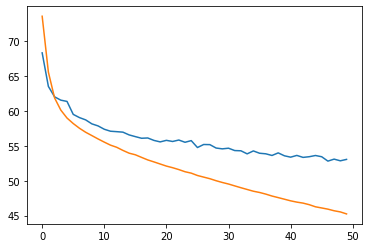

In [47]:
plt.plot(history.epoch, history.history['val_mae'])
plt.plot(history.epoch, history.history['mae'])

# LSTM网络进行预测

In [48]:
model = keras.Sequential()

In [49]:
model.add(layers.LSTM(32, input_shape = (120,11)))
model.add(layers.Dense(1))

In [50]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

In [51]:
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=50, validation_data=(test_x, test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/50
34924/34924 [==============================] - 11s 323us/sample - loss: 16007.0571 - mae: 87.9691 - val_loss: 14983.6192 - val_mae: 82.5555
Epoch 2/50
34924/34924 [==============================] - 5s 155us/sample - loss: 14130.0520 - mae: 79.3524 - val_loss: 13592.2602 - val_mae: 76.9532
Epoch 3/50
34924/34924 [==============================] - 5s 155us/sample - loss: 12891.8416 - mae: 74.6649 - val_loss: 12477.4625 - val_mae: 72.9738
Epoch 4/50
34924/34924 [==============================] - 5s 155us/sample - loss: 11884.9840 - mae: 71.2881 - val_loss: 11560.7587 - val_mae: 70.0193
Epoch 5/50
34924/34924 [==============================] - 5s 156us/sample - loss: 11060.6296 - mae: 68.8536 - val_loss: 10812.7833 - val_mae: 67.9772
Epoch 6/50
34924/34924 [==============================] - 5s 156us/sample - loss: 10389.7818 - mae: 67.1587 - val_loss: 10207.4665 - val_mae: 66.6184
Epoch 7/50
34924/34924 [==========================

# LSTM优化

在训练过程中降低学习速率

In [52]:
model = keras.Sequential()

In [53]:
model.add(layers.LSTM(32, input_shape = (120,11), return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [54]:
lr_reduce = keras.callbacks.ReduceLROnPlateau('val_loss', patience=3, factor=0.5, min_lr=0.000001)

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120, 32)           5632      
_________________________________________________________________
lstm_2 (LSTM)                (None, 120, 32)           8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 120, 32)           8320      
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

In [57]:
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=200, callbacks=[lr_reduce], validation_data=(test_x, test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/200
34924/34924 [==============================] - 19s 538us/sample - loss: 16064.4466 - mae: 88.1602 - val_loss: 15234.7312 - val_mae: 83.6759
Epoch 2/200
34924/34924 [==============================] - 11s 326us/sample - loss: 14399.7068 - mae: 80.4180 - val_loss: 13869.8775 - val_mae: 78.0012
Epoch 3/200
34924/34924 [==============================] - 11s 326us/sample - loss: 13163.9611 - mae: 75.6277 - val_loss: 12741.2102 - val_mae: 73.8864
Epoch 4/200
34924/34924 [==============================] - 11s 326us/sample - loss: 12136.4287 - mae: 72.0838 - val_loss: 11799.3830 - val_mae: 70.7495
Epoch 5/200
34924/34924 [==============================] - 11s 326us/sample - loss: 11283.6905 - mae: 69.4723 - val_loss: 11020.7855 - val_mae: 68.5088
Epoch 6/200
34924/34924 [==============================] - 11s 327us/sample - loss: 10581.3268 - mae: 67.6141 - val_loss: 10384.3336 - val_mae: 66.9924
Epoch 7/200
34924/34924 [==============

Epoch 55/200
34924/34924 [==============================] - 11s 326us/sample - loss: 5686.4865 - mae: 50.1837 - val_loss: 5850.7952 - val_mae: 50.7536
Epoch 56/200
34924/34924 [==============================] - 11s 326us/sample - loss: 5651.5819 - mae: 50.0501 - val_loss: 5800.2825 - val_mae: 50.7936
Epoch 57/200
34924/34924 [==============================] - 11s 326us/sample - loss: 5548.8131 - mae: 49.5042 - val_loss: 5747.0634 - val_mae: 50.1964
Epoch 58/200
34924/34924 [==============================] - 11s 327us/sample - loss: 5519.6242 - mae: 49.4050 - val_loss: 5623.8139 - val_mae: 49.4494
Epoch 59/200
34924/34924 [==============================] - 11s 326us/sample - loss: 5483.3981 - mae: 49.3902 - val_loss: 5914.4133 - val_mae: 51.5972
Epoch 60/200
34924/34924 [==============================] - 11s 328us/sample - loss: 5369.1115 - mae: 48.8012 - val_loss: 5518.2836 - val_mae: 49.2374
Epoch 61/200
34924/34924 [==============================] - 11s 326us/sample - loss: 5263.2266

34924/34924 [==============================] - 11s 326us/sample - loss: 3112.3466 - mae: 36.5875 - val_loss: 3228.0973 - val_mae: 36.8990
Epoch 110/200
34924/34924 [==============================] - 14s 401us/sample - loss: 2864.7386 - mae: 34.9227 - val_loss: 3267.4562 - val_mae: 37.2835
Epoch 111/200
34924/34924 [==============================] - 14s 406us/sample - loss: 2845.7748 - mae: 34.9219 - val_loss: 3171.3344 - val_mae: 36.2872
Epoch 112/200
34924/34924 [==============================] - 14s 405us/sample - loss: 2967.1170 - mae: 35.7605 - val_loss: 3500.4341 - val_mae: 39.0983
Epoch 113/200
34924/34924 [==============================] - 14s 402us/sample - loss: 2891.1831 - mae: 35.3222 - val_loss: 3219.6771 - val_mae: 36.7727
Epoch 114/200
34924/34924 [==============================] - 14s 407us/sample - loss: 2824.5334 - mae: 34.9619 - val_loss: 3200.0407 - val_mae: 36.9619
Epoch 115/200
34924/34924 [==============================] - 14s 405us/sample - loss: 2634.1479 - mae:

34924/34924 [==============================] - 14s 404us/sample - loss: 2007.6360 - mae: 28.6785 - val_loss: 2398.1461 - val_mae: 30.9255
Epoch 163/200
34924/34924 [==============================] - 14s 408us/sample - loss: 2025.9105 - mae: 28.7744 - val_loss: 2369.0114 - val_mae: 30.6907
Epoch 164/200
34924/34924 [==============================] - 14s 405us/sample - loss: 1946.6922 - mae: 28.0371 - val_loss: 2366.2857 - val_mae: 30.5981
Epoch 165/200
34924/34924 [==============================] - 14s 409us/sample - loss: 1930.7942 - mae: 27.9386 - val_loss: 2333.1002 - val_mae: 30.4673
Epoch 166/200
34924/34924 [==============================] - 14s 404us/sample - loss: 1928.1551 - mae: 27.8723 - val_loss: 2328.6660 - val_mae: 30.3368
Epoch 167/200
34924/34924 [==============================] - 14s 405us/sample - loss: 1916.4613 - mae: 27.7489 - val_loss: 2332.2022 - val_mae: 30.3611
Epoch 168/200
34924/34924 [==============================] - 14s 406us/sample - loss: 1909.9520 - mae:

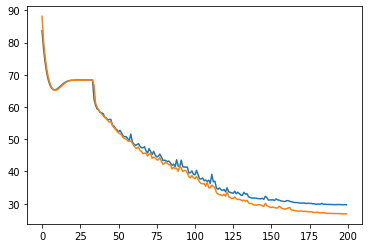

In [58]:
plt.plot(history.epoch, history.history['val_mae'])
plt.plot(history.epoch, history.history['mae'])